# Momo AI Engineer test - CV Team

Thí sinh tạo một bản copy của notebook này về Drive của mình để bắt đầu làm bài. Kết quả bài làm cần nộp là bản notebook của thí sinh với phần code còn trống đã được hoàn thành.

## Bài 1 : Multi-layer Perceptron for Fashion MNIST classification


Nội dung của bài thi yêu cầu thí sinh thực hiện một mạng Multi-layer Perceptron (MLP) đơn giản, bao gồm forward pass và backpropagation. Mạng này sẽ được dùng để giải quyết bài toán phân loại chữ số trên tập dữ liệu ảnh Fashion MNIST, bao gồm 60000 ảnh train và 10000 ảnh test.

Thí sinh có thể sử dụng các hàm tính toán sẵn có của Python cũng như thư viện hỗ trợ tính toán trên ma trận như nunpy, nhưng không được sử dụng các thư viện deep learning chuyên dụng trong solution của mình (Pytorch, Tensorflow, Keras...)

2024-07-15 11:48:37.247901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
60000 train samples
10000 test samples


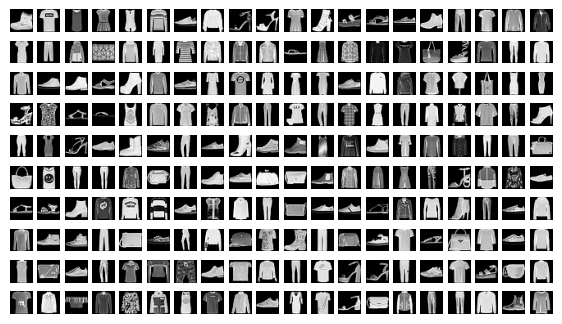

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

K=10 #number of classes

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, K)
Y_test = to_categorical(y_test, K)

plt.figure(figsize=(7, 4), dpi=100)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

Các hàm hỗ trợ được cung cấp:

In [2]:
# Hàm tính sigmoid
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

# Hàm tính softmax
def softmax(X):
    # Input matrix X of size Nbxd - Output matrix of same size
    E = np.exp(X)
    return (E.T / np.sum(E,axis=1)).T

# Hàm tính accuracy
def accuracy(batch, labels, Wh, bh, Wy, by):
   latent, pred = forward(batch, Wh, bh, Wy, by)
   return np.where(pred.argmax(axis=1) != labels.argmax(axis=1) , 0.,1.).mean()*100.0

### Forward pass của mạng MLP

Trong tập dữ liệu Fashion MNIST, mỗi hình ảnh sẽ được biểu diễn bởi một vector size $ 28^2=784 $.
Từ vector này để ra được output classification cuối cùng chúng ta cần thực hiện các bước xử lý sau:

- Projection tuyến tính (linear) từ vector input ảnh kích thước $ (1,784) $ về vector kích thước $ (1,L) $, *vd.* $ L=100 $. Phép projection này có thể được biểu diễn bởi ma trận $ \mathbf{W^h} $ (kích thước $ (784, L) $), và vector bias $ \mathbf{b^h} $ (kích thước $ (1, L) $) : $ \mathbf{\hat{u_i}} =\mathbf{x_i}  \mathbf{W^h}  + \mathbf{b^h} $.

> - Output đi qua một hàm phi tuyến tính (non-linear), *vd.* hàm sigmoid :  $ \forall j \in  \left\lbrace 1; L \right\rbrace  ~ h_{i,j} = \frac{1}{1+exp(-u_{i,j})} $  

- Bước projection tuyến tính thứ 2, từ vector kích thước $ (1,L) $ về vector kích thước $ (1,K)=10 $ (số classes cần classify). Phép projection này có thể được biểu diễn bởi ma trận $ \mathbf{W^y} $ (kích thước $ (L, K) $), và vector bias $ \mathbf{b^y} $ (kích thước $ (1, K) $) : $ \mathbf{\hat{v_i}} =\mathbf{h_i}  \mathbf{W^y}  + \mathbf{b^y} $.  

> - Output đi qua hàm phi tuyến tính softmax để có kết quả prediction cuối cùng: $ \forall j \in  \left\lbrace 1; K \right\rbrace  ~ y_{i,j} = \frac{exp(v_{i,j})}{\sum\limits_{i=1}^K exp(v_{i,k})} $  

Thí sinh hiện thực quá trình trên trong hàm forward ở dưới:
> - Với input data có batch size $ t_b\times 784 $, các parameters $ \mathbf{W^h} $ (kích thước $ 784\times L $), $ \mathbf{b^h} $ ((kích thước $ 1\times L $), $ \mathbf{W^y} $ ((kích thước $ L\times K $) et $ \mathbf{b^y} $ ((kích thước $ 1\times K $), hàm `forward` output prediction $ \mathbf{\hat{Y}} $ cho input batch (kích thước $ t_b\times K $) cũng như ma trận latent variable (kích thước $ t_b\times L $).  


</dd>

</dl>

In [3]:
# Hàm forward của mạng MLP
def forward(batch, Wh, bh, Wy, by):
    #########################################################################
    #                       START OF YOUR CODE                              #
    #########################################################################
    #hints: use numpy matmul and provided functions (sigmoid, softmax...)

    latent = sigmoid(np.matmul(batch, Wh) + bh)
    pred = softmax(np.matmul(latent, Wy) + by)

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return latent, pred

### Backward pass của mạng MLP

Sau khi thực hiện forward pass, quá trình backpropagation của mạng MLP được tiến hành như sau :

1. Cập nhật $ \mathbf{W^y} $ và $ \mathbf{b^y} $ :  


$$
\frac{\partial \mathcal{L}}{\partial \mathbf{v_i}} = \mathbf{\delta^y_i} = \mathbf{\hat{y_i}} - \mathbf{y_i^*}
$$


<a id='equation-gradientw'></a>
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W^y}} = \frac{1}{t_b}\mathbf{H}^T (\mathbf{\hat{Y}} - \mathbf{Y^*}) = \frac{1}{t_b} \mathbf{H}^T \mathbf{\Delta^y}
$$


<a id='equation-gradientb'></a>
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b^y}} = \frac{1}{t_b}\sum_{i=1}^{t_b}(\mathbf{\hat{y_i}} - \mathbf{y_i^*})
$$

Với  $ \mathbf{H} $ là ma trận của hidden layer cho batch (kích thước $ t_b\times L $), $ \mathbf{\hat{Y}} $ là ma trận kết quả dự đoán của model (kích thước $ t_b\times K $), $ \mathbf{Y^*} $ là ma trận nhãn ground truth (kích thước $ t_b\times K $), và $ \mathbf{\Delta^y}=\mathbf{\hat{Y}}-\mathbf{Y^*} $.

1. Cập nhật $ \mathbf{W^h} $ và $ \mathbf{b^h} $ :  


$$
\frac{\partial \mathcal{L}}{\partial \mathbf{u_i}} = \mathbf{\delta^h_i} = \mathbf{\delta^y_i} \mathbf{W^{y}}^T   \odot \sigma^{'}(\mathbf{u_i}) = \mathbf{\delta^y_i} \mathbf{W^{y}}^T \odot (\mathbf{h_i} \odot (1-\mathbf{h_i}))
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W^h}} =  \frac{1}{t_b} \mathbf{X}^T \mathbf{\Delta^h}
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b^h}} = \frac{1}{t_b}\sum_{i=1}^{t_b}(\delta^h_i)
$$

Với $ \mathbf{X} $ là ma trận input của batch (kích thước $ t_b\times 784 $), và $ \mathbf{\Delta^h} $ là ma trận của $ \delta^h_i $ cho batch (kích thước $ t_b\times L $).

### Training và evaluation
Thí sinh hiện thực backward pass và tiến hành training model trong 100 epochs.

In [36]:
d = X_train.shape[1] # input dimension (784)
N = X_train.shape[0] # train sample size (60000)
L=125 # latent space dimension

# Weight initialization
# Bonus points: Thí sinh có thể implement một initializer phù hợp hơn cho mạng MLP (vd: Xavier initialization) để đạt kết quả classification tốt hơn
limit = np.sqrt(6 / float(d + L))
Wh = np.random.uniform(low=-limit, high=limit, size=(d, L))
bh = np.zeros((1,L))
limit = np.sqrt(6 / float(L + K))
Wy = np.random.uniform(low=-limit, high=limit, size=(L, K))
by = np.zeros((1,K))

# Hyperparameters
numEpochs = 100
eta = 1

batch_size = 100
nb_batches = int(float(N) / batch_size)

for epoch in range(numEpochs):
    for b in range(nb_batches):

        # FORWARD PASS : compute prediction with current params for examples in batch
        begin = b * batch_size
        end = min(begin + batch_size, N-1)
        X = X_train[begin:end,:]
        Y = Y_train[begin:end,:]
        m_batch = end - begin

        latent, pred = forward(X, Wh, bh, Wy, by)

        # BACKWARD PASS :
        # Compute gradients dWh, dbh, dWy, dby

        #########################################################################
        #                       START OF YOUR CODE                              #
        #########################################################################
        # hints: use numpy functions such as matmul, sum...

        sigma_y = pred - Y
        dWy = 1.0/batch_size * np.matmul(np.transpose(latent), sigma_y)
        dby = 1.0/batch_size * np.sum(sigma_y, axis=0)
        sigma_h = np.matmul(sigma_y, np.transpose(Wy)) * (latent * (1 - latent))
        dWh = 1.0/batch_size * np.matmul(np.transpose(X), sigma_h)
        dbh = 1.0/batch_size * np.sum(sigma_h, axis=0)

        #########################################################################
        #                       END OF YOUR CODE                                #
        #########################################################################

        # Update network weights
        Wh = Wh - eta * dWh
        bh = bh - eta * dbh
        Wy = Wy - eta * dWy
        by = by - eta * dby

    print("epoch ", epoch, "accurcy train=",accuracy(X_train, Y_train, Wh, bh, Wy, by), "accurcy test=",accuracy(X_test, Y_test, Wh, bh, Wy, by))

epoch  0 accurcy train= 84.185 accurcy test= 82.91
epoch  1 accurcy train= 86.14166666666667 accurcy test= 84.63000000000001
epoch  2 accurcy train= 87.01333333333334 accurcy test= 85.45
epoch  3 accurcy train= 87.575 accurcy test= 85.74000000000001
epoch  4 accurcy train= 88.03999999999999 accurcy test= 86.16
epoch  5 accurcy train= 88.42166666666667 accurcy test= 86.59
epoch  6 accurcy train= 88.84666666666666 accurcy test= 86.83
epoch  7 accurcy train= 89.27333333333334 accurcy test= 86.99
epoch  8 accurcy train= 89.61833333333334 accurcy test= 87.29
epoch  9 accurcy train= 89.89 accurcy test= 87.53999999999999
epoch  10 accurcy train= 90.16999999999999 accurcy test= 87.66000000000001
epoch  11 accurcy train= 90.39833333333334 accurcy test= 87.79
epoch  12 accurcy train= 90.58833333333334 accurcy test= 87.85
epoch  13 accurcy train= 90.755 accurcy test= 87.96000000000001
epoch  14 accurcy train= 90.96166666666666 accurcy test= 88.08
epoch  15 accurcy train= 91.09166666666667 accurcy

## Bài 2 : Custom Model for CIFAR-10 classification


Trong bài này thí sinh sẽ làm việc với tập dữ liệu CIFAR-10 như sau:

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step
50000 train samples
10000 test samples


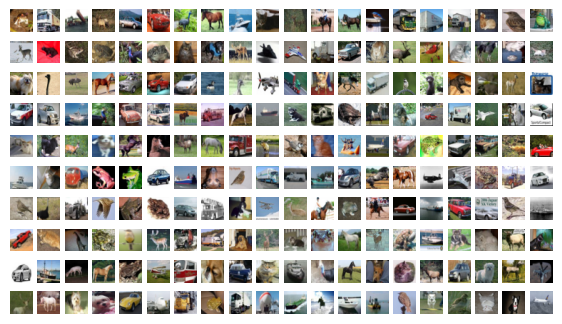

In [46]:
from keras.datasets import cifar10
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

plt.figure(figsize=(7, 4), dpi=100)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([32,32,3]))
  plt.axis('off')
plt.show()

Đây là đề bài mở, cho phép thí sinh vận dụng kiến thức mình có và tất cả các công cụ có thể sử dụng để xây dựng model tốt nhất cho bài toán này.

Một số gợi ý:
- Có thể sử dụng thư viện deep learning tùy chọn (Pytorch, Keras...) cùng các thư viện hỗ trợ cho computer vision (timm, transformers, albumentations...)
- Có thể sử dụng các thư viện Trainer để đơn giản hóa training code (Pytorch Lightning, Huggingface Trainer...)
- Có thể sử dụng các weight model pretrained có sẵn, thí sinh giải thích lựa chọn của mình.
- Có thể tùy chọn các thuật toán data augmentation, custom losses, optimizers, learning rate schedulers, test time augmentation cùng các kỹ thuật nâng cao khác, tùy theo mong muốn của thí sinh. Hãy giải thích lựa chọn của mình chi tiết nhất có thể.
- Đánh giá kết quả training bằng accuracy tập validation ở cuối notebook.

### Nhận xét:
Tôi sẽ không xây dựng model tốt nhất cho bài toán này, vì nếu tìm model tốt nhất thì hãy xem ở trang web này: https://paperswithcode.com/dataset/cifar-10

Cái người ta đã làm tốt hơn mình thì tôi sẽ học chứ không tìm cách cạnh tranh lại.

Vì đây là đề bài mở, nên tôi sẽ thí nghiệm chạy với vài phương pháp, và kết luận cuối cùng học được gì từ đó. Các phương pháp sẽ là:
- Chạy với một phương pháp đã được thử trên tập CIFAR 10 và đạt kết quả >90% được tìm thấy trên Kaggle
- Chạy với model pretrained SOTA
- Áp dụng DCN

In [ ]:
# code from link: https://www.kaggle.com/competitions/cifar-10/discussion/40237
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

baseMapNum = 32
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

#training
batch_size = 64
epochs=25
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=3*epochs,verbose=1,validation_data=(x_test,y_test))

opt_rms = keras.optimizers.RMSprop(learning_rate=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

opt_rms = keras.optimizers.RMSprop(learning_rate=0.0003,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

#testing - no kaggle eval
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/75


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


781/781 ━━━━━━━━━━━━━━━━━━━━ 242s 306ms/step - accuracy: 0.3516 - loss: 2.3807 - val_accuracy: 0.5638 - val_loss: 1.5556
Epoch 2/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:21 335ms/step - accuracy: 0.5625 - loss: 1.4245

2024-07-16 06:27:01.577238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5625 - loss: 1.4245 - val_accuracy: 0.5427 - val_loss: 1.6068
Epoch 3/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 292s 374ms/step - accuracy: 0.5664 - loss: 1.4293 - val_accuracy: 0.6273 - val_loss: 1.2676
Epoch 4/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:26 419ms/step - accuracy: 0.6406 - loss: 1.3281

2024-07-16 06:32:01.769536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6406 - loss: 1.3281 - val_accuracy: 0.6409 - val_loss: 1.1836
Epoch 5/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 492s 630ms/step - accuracy: 0.6420 - loss: 1.1811 - val_accuracy: 0.6883 - val_loss: 1.0169
Epoch 6/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 7:17 560ms/step - accuracy: 0.7656 - loss: 0.9447

2024-07-16 06:40:26.123116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.7656 - loss: 0.9447 - val_accuracy: 0.7013 - val_loss: 0.9781
Epoch 7/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 470s 601ms/step - accuracy: 0.6795 - loss: 1.0449 - val_accuracy: 0.7284 - val_loss: 0.9214
Epoch 8/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 7:43 595ms/step - accuracy: 0.6719 - loss: 0.9476

2024-07-16 06:48:30.527273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6719 - loss: 0.9476 - val_accuracy: 0.7321 - val_loss: 0.9212
Epoch 9/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 385s 492ms/step - accuracy: 0.7122 - loss: 0.9455 - val_accuracy: 0.7365 - val_loss: 0.9029
Epoch 10/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:20 411ms/step - accuracy: 0.7969 - loss: 0.7287

2024-07-16 06:55:12.700581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7969 - loss: 0.7287 - val_accuracy: 0.7454 - val_loss: 0.8675
Epoch 11/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 309s 395ms/step - accuracy: 0.7343 - loss: 0.8851 - val_accuracy: 0.7652 - val_loss: 0.8189
Epoch 12/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:12 400ms/step - accuracy: 0.6875 - loss: 1.0288

2024-07-16 07:00:32.842171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6875 - loss: 1.0288 - val_accuracy: 0.7613 - val_loss: 0.8357
Epoch 13/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 322s 412ms/step - accuracy: 0.7442 - loss: 0.8616 - val_accuracy: 0.7657 - val_loss: 0.8006
Epoch 14/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 6:28 498ms/step - accuracy: 0.6875 - loss: 0.9022

2024-07-16 07:06:06.334258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6875 - loss: 0.9022 - val_accuracy: 0.7561 - val_loss: 0.8478
Epoch 15/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 326s 414ms/step - accuracy: 0.7548 - loss: 0.8386 - val_accuracy: 0.7865 - val_loss: 0.7525
Epoch 16/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:17 330ms/step - accuracy: 0.7969 - loss: 0.8231

2024-07-16 07:11:48.373346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7969 - loss: 0.8231 - val_accuracy: 0.7708 - val_loss: 0.8179
Epoch 17/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 292s 374ms/step - accuracy: 0.7646 - loss: 0.8049 - val_accuracy: 0.7961 - val_loss: 0.7240
Epoch 18/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:25 340ms/step - accuracy: 0.7500 - loss: 0.8440

2024-07-16 07:16:50.435016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7500 - loss: 0.8440 - val_accuracy: 0.7993 - val_loss: 0.7204
Epoch 19/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 315s 403ms/step - accuracy: 0.7778 - loss: 0.7824 - val_accuracy: 0.8059 - val_loss: 0.6993
Epoch 20/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 10:20 796ms/step - accuracy: 0.7500 - loss: 0.6778

2024-07-16 07:22:16.271635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7500 - loss: 0.6778 - val_accuracy: 0.8023 - val_loss: 0.7137
Epoch 21/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 316s 403ms/step - accuracy: 0.7804 - loss: 0.7702 - val_accuracy: 0.7878 - val_loss: 0.7721
Epoch 22/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:39 358ms/step - accuracy: 0.6875 - loss: 1.1285

2024-07-16 07:27:44.872240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6875 - loss: 1.1285 - val_accuracy: 0.8008 - val_loss: 0.7185
Epoch 23/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 318s 407ms/step - accuracy: 0.7839 - loss: 0.7491 - val_accuracy: 0.7973 - val_loss: 0.7269
Epoch 24/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:50 372ms/step - accuracy: 0.8438 - loss: 0.5840

2024-07-16 07:33:12.975625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8438 - loss: 0.5840 - val_accuracy: 0.8072 - val_loss: 0.6949
Epoch 25/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 327s 418ms/step - accuracy: 0.7916 - loss: 0.7349 - val_accuracy: 0.8196 - val_loss: 0.6748
Epoch 26/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:50 373ms/step - accuracy: 0.8125 - loss: 0.6767

2024-07-16 07:38:51.374421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8125 - loss: 0.6767 - val_accuracy: 0.8187 - val_loss: 0.6733
Epoch 27/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 336s 429ms/step - accuracy: 0.7984 - loss: 0.7228 - val_accuracy: 0.8321 - val_loss: 0.6220
Epoch 28/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:22 413ms/step - accuracy: 0.7500 - loss: 0.7268

2024-07-16 07:44:38.338558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7500 - loss: 0.7268 - val_accuracy: 0.8270 - val_loss: 0.6411
Epoch 29/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 340s 435ms/step - accuracy: 0.8048 - loss: 0.7068 - val_accuracy: 0.8128 - val_loss: 0.6791
Epoch 30/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:21 412ms/step - accuracy: 0.7812 - loss: 0.7936

2024-07-16 07:50:30.766913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7812 - loss: 0.7936 - val_accuracy: 0.8051 - val_loss: 0.7110
Epoch 31/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 318s 407ms/step - accuracy: 0.8077 - loss: 0.6966 - val_accuracy: 0.7879 - val_loss: 0.7819
Epoch 32/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:18 409ms/step - accuracy: 0.7969 - loss: 0.6793

2024-07-16 07:56:00.210748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7969 - loss: 0.6793 - val_accuracy: 0.7989 - val_loss: 0.7456
Epoch 33/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 362s 463ms/step - accuracy: 0.8083 - loss: 0.6923 - val_accuracy: 0.8103 - val_loss: 0.6922
Epoch 34/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11:57 919ms/step - accuracy: 0.8125 - loss: 0.8013

2024-07-16 08:02:14.460375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.8125 - loss: 0.8013 - val_accuracy: 0.8230 - val_loss: 0.6586
Epoch 35/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 455s 581ms/step - accuracy: 0.8135 - loss: 0.6856 - val_accuracy: 0.8255 - val_loss: 0.6461
Epoch 36/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 7:21 566ms/step - accuracy: 0.8281 - loss: 0.5640

2024-07-16 08:10:12.428369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8281 - loss: 0.5640 - val_accuracy: 0.8331 - val_loss: 0.6319
Epoch 37/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 325s 415ms/step - accuracy: 0.8122 - loss: 0.6835 - val_accuracy: 0.8397 - val_loss: 0.6202
Epoch 38/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:37 433ms/step - accuracy: 0.8438 - loss: 0.7347

2024-07-16 08:15:50.906215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8438 - loss: 0.7347 - val_accuracy: 0.8380 - val_loss: 0.6188
Epoch 39/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 299s 382ms/step - accuracy: 0.8194 - loss: 0.6653 - val_accuracy: 0.8104 - val_loss: 0.7116
Epoch 40/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:46 368ms/step - accuracy: 0.8281 - loss: 0.7272

2024-07-16 08:21:00.981271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8281 - loss: 0.7272 - val_accuracy: 0.8175 - val_loss: 0.6958
Epoch 41/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 270s 345ms/step - accuracy: 0.8213 - loss: 0.6555 - val_accuracy: 0.8404 - val_loss: 0.6209
Epoch 42/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:55 302ms/step - accuracy: 0.7344 - loss: 0.7850

2024-07-16 08:25:40.237149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7344 - loss: 0.7850 - val_accuracy: 0.8412 - val_loss: 0.6122
Epoch 43/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 268s 341ms/step - accuracy: 0.8183 - loss: 0.6656 - val_accuracy: 0.8276 - val_loss: 0.6609
Epoch 44/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:44 365ms/step - accuracy: 0.8125 - loss: 0.8264

2024-07-16 08:30:17.003494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8125 - loss: 0.8264 - val_accuracy: 0.8370 - val_loss: 0.6341
Epoch 45/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 275s 352ms/step - accuracy: 0.8218 - loss: 0.6565 - val_accuracy: 0.8393 - val_loss: 0.6295
Epoch 46/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:31 348ms/step - accuracy: 0.8281 - loss: 0.6603

2024-07-16 08:35:01.757981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8281 - loss: 0.6603 - val_accuracy: 0.8195 - val_loss: 0.6953
Epoch 47/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 304s 389ms/step - accuracy: 0.8267 - loss: 0.6461 - val_accuracy: 0.8415 - val_loss: 0.6178
Epoch 48/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:42 439ms/step - accuracy: 0.8594 - loss: 0.4858

2024-07-16 08:40:15.484877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8594 - loss: 0.4858 - val_accuracy: 0.8375 - val_loss: 0.6283
Epoch 49/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 335s 429ms/step - accuracy: 0.8266 - loss: 0.6468 - val_accuracy: 0.8224 - val_loss: 0.7020
Epoch 50/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:48 447ms/step - accuracy: 0.8125 - loss: 0.5400

2024-07-16 08:46:01.323672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8125 - loss: 0.5400 - val_accuracy: 0.8316 - val_loss: 0.6635
Epoch 51/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 314s 401ms/step - accuracy: 0.8309 - loss: 0.6305 - val_accuracy: 0.8181 - val_loss: 0.7082
Epoch 52/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:35 430ms/step - accuracy: 0.8125 - loss: 0.6538

2024-07-16 08:51:25.983465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8125 - loss: 0.6538 - val_accuracy: 0.8219 - val_loss: 0.6943
Epoch 53/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 311s 398ms/step - accuracy: 0.8289 - loss: 0.6398 - val_accuracy: 0.8316 - val_loss: 0.6632
Epoch 54/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 7:01 541ms/step - accuracy: 0.9219 - loss: 0.4984

2024-07-16 08:56:47.939730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9219 - loss: 0.4984 - val_accuracy: 0.8350 - val_loss: 0.6526
Epoch 55/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 307s 393ms/step - accuracy: 0.8306 - loss: 0.6373 - val_accuracy: 0.8141 - val_loss: 0.7081
Epoch 56/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:49 371ms/step - accuracy: 0.8125 - loss: 0.6652

2024-07-16 09:02:06.353267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8125 - loss: 0.6652 - val_accuracy: 0.8244 - val_loss: 0.6728
Epoch 57/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 315s 402ms/step - accuracy: 0.8312 - loss: 0.6312 - val_accuracy: 0.8217 - val_loss: 0.6973
Epoch 58/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:58 383ms/step - accuracy: 0.7969 - loss: 0.7161

2024-07-16 09:07:30.085687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7969 - loss: 0.7161 - val_accuracy: 0.8226 - val_loss: 0.6893
Epoch 59/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 332s 425ms/step - accuracy: 0.8351 - loss: 0.6249 - val_accuracy: 0.8389 - val_loss: 0.6424
Epoch 60/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:28 345ms/step - accuracy: 0.8281 - loss: 0.5466

2024-07-16 09:13:13.480889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8281 - loss: 0.5466 - val_accuracy: 0.8338 - val_loss: 0.6593
Epoch 61/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 292s 373ms/step - accuracy: 0.8364 - loss: 0.6176 - val_accuracy: 0.8309 - val_loss: 0.6608
Epoch 62/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:13 325ms/step - accuracy: 0.7500 - loss: 0.8390

2024-07-16 09:18:14.563378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7500 - loss: 0.8390 - val_accuracy: 0.8278 - val_loss: 0.6772
Epoch 63/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 263s 336ms/step - accuracy: 0.8359 - loss: 0.6224 - val_accuracy: 0.8233 - val_loss: 0.6859
Epoch 64/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:24 339ms/step - accuracy: 0.8125 - loss: 0.8307

2024-07-16 09:22:46.631393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8125 - loss: 0.8307 - val_accuracy: 0.8351 - val_loss: 0.6456
Epoch 65/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 278s 355ms/step - accuracy: 0.8373 - loss: 0.6280 - val_accuracy: 0.8351 - val_loss: 0.6554
Epoch 66/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:17 330ms/step - accuracy: 0.8438 - loss: 0.6570

2024-07-16 09:27:33.339807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8438 - loss: 0.6570 - val_accuracy: 0.8374 - val_loss: 0.6447
Epoch 67/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 272s 348ms/step - accuracy: 0.8410 - loss: 0.6110 - val_accuracy: 0.8528 - val_loss: 0.6037
Epoch 68/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:57 305ms/step - accuracy: 0.8125 - loss: 0.7831

2024-07-16 09:32:14.726773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8125 - loss: 0.7831 - val_accuracy: 0.8577 - val_loss: 0.5914
Epoch 69/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 291s 373ms/step - accuracy: 0.8377 - loss: 0.6199 - val_accuracy: 0.8360 - val_loss: 0.6549
Epoch 70/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:11 323ms/step - accuracy: 0.8750 - loss: 0.5915

2024-07-16 09:37:15.279265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8750 - loss: 0.5915 - val_accuracy: 0.8347 - val_loss: 0.6601
Epoch 71/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 293s 374ms/step - accuracy: 0.8380 - loss: 0.6191 - val_accuracy: 0.8288 - val_loss: 0.6777
Epoch 72/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:46 367ms/step - accuracy: 0.7969 - loss: 0.7253

2024-07-16 09:42:18.058108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7969 - loss: 0.7253 - val_accuracy: 0.8309 - val_loss: 0.6771
Epoch 73/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 316s 405ms/step - accuracy: 0.8343 - loss: 0.6198 - val_accuracy: 0.8241 - val_loss: 0.6939
Epoch 74/75
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:06 393ms/step - accuracy: 0.8594 - loss: 0.5393

2024-07-16 09:47:44.224837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8594 - loss: 0.5393 - val_accuracy: 0.8350 - val_loss: 0.6607
Epoch 75/75
781/781 ━━━━━━━━━━━━━━━━━━━━ 301s 385ms/step - accuracy: 0.8417 - loss: 0.6155 - val_accuracy: 0.8384 - val_loss: 0.6364
Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 300s 376ms/step - accuracy: 0.8562 - loss: 0.5723 - val_accuracy: 0.8632 - val_loss: 0.5639
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:07 394ms/step - accuracy: 0.8438 - loss: 0.4978

2024-07-16 09:57:56.892030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8438 - loss: 0.4978 - val_accuracy: 0.8621 - val_loss: 0.5667
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 315s 403ms/step - accuracy: 0.8599 - loss: 0.5467 - val_accuracy: 0.8466 - val_loss: 0.6162
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:52 375ms/step - accuracy: 0.7969 - loss: 0.6629

2024-07-16 10:03:22.168940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7969 - loss: 0.6629 - val_accuracy: 0.8481 - val_loss: 0.6116
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 358s 458ms/step - accuracy: 0.8612 - loss: 0.5447 - val_accuracy: 0.8634 - val_loss: 0.5582
Epoch 6/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:16 328ms/step - accuracy: 0.8594 - loss: 0.5389

2024-07-16 10:09:31.958048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8594 - loss: 0.5389 - val_accuracy: 0.8595 - val_loss: 0.5746
Epoch 7/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 280s 359ms/step - accuracy: 0.8652 - loss: 0.5279 - val_accuracy: 0.8636 - val_loss: 0.5519
Epoch 8/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:44 364ms/step - accuracy: 0.7969 - loss: 0.8070

2024-07-16 10:14:21.792085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7969 - loss: 0.8070 - val_accuracy: 0.8660 - val_loss: 0.5517
Epoch 9/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 280s 358ms/step - accuracy: 0.8621 - loss: 0.5345 - val_accuracy: 0.8666 - val_loss: 0.5399
Epoch 10/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:16 405ms/step - accuracy: 0.8750 - loss: 0.4607

2024-07-16 10:19:11.601142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8750 - loss: 0.4607 - val_accuracy: 0.8664 - val_loss: 0.5430
Epoch 11/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 267s 342ms/step - accuracy: 0.8655 - loss: 0.5256 - val_accuracy: 0.8559 - val_loss: 0.5817
Epoch 12/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:59 307ms/step - accuracy: 0.7812 - loss: 0.7768

2024-07-16 10:23:48.937514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7812 - loss: 0.7768 - val_accuracy: 0.8605 - val_loss: 0.5610
Epoch 13/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 246s 315ms/step - accuracy: 0.8685 - loss: 0.5115 - val_accuracy: 0.8632 - val_loss: 0.5489
Epoch 14/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:01 310ms/step - accuracy: 0.7812 - loss: 0.5577

2024-07-16 10:28:03.291610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7812 - loss: 0.5577 - val_accuracy: 0.8662 - val_loss: 0.5399
Epoch 15/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 256s 327ms/step - accuracy: 0.8681 - loss: 0.5137 - val_accuracy: 0.8674 - val_loss: 0.5417
Epoch 16/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:37 432ms/step - accuracy: 0.8594 - loss: 0.5207

2024-07-16 10:32:27.335450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8594 - loss: 0.5207 - val_accuracy: 0.8678 - val_loss: 0.5422
Epoch 17/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 408s 522ms/step - accuracy: 0.8668 - loss: 0.5146 - val_accuracy: 0.8511 - val_loss: 0.5936
Epoch 18/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:28 344ms/step - accuracy: 0.8438 - loss: 0.4134

2024-07-16 10:39:26.580776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8438 - loss: 0.4134 - val_accuracy: 0.8591 - val_loss: 0.5644
Epoch 19/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 338s 432ms/step - accuracy: 0.8693 - loss: 0.5089 - val_accuracy: 0.8619 - val_loss: 0.5511
Epoch 20/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:35 353ms/step - accuracy: 0.9062 - loss: 0.4783

2024-07-16 10:45:15.982960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9062 - loss: 0.4783 - val_accuracy: 0.8601 - val_loss: 0.5626
Epoch 21/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 290s 371ms/step - accuracy: 0.8702 - loss: 0.5036 - val_accuracy: 0.8638 - val_loss: 0.5481
Epoch 22/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:47 368ms/step - accuracy: 0.9375 - loss: 0.2858

2024-07-16 10:50:16.913367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9375 - loss: 0.2858 - val_accuracy: 0.8618 - val_loss: 0.5595
Epoch 23/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 373s 478ms/step - accuracy: 0.8714 - loss: 0.4997 - val_accuracy: 0.8675 - val_loss: 0.5370
Epoch 24/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11:43 902ms/step - accuracy: 0.8594 - loss: 0.3714

2024-07-16 10:56:40.916465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8594 - loss: 0.3714 - val_accuracy: 0.8703 - val_loss: 0.5263
Epoch 25/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 369s 470ms/step - accuracy: 0.8723 - loss: 0.4980 - val_accuracy: 0.8664 - val_loss: 0.5429
Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 348s 438ms/step - accuracy: 0.8739 - loss: 0.4862 - val_accuracy: 0.8694 - val_loss: 0.5236
Epoch 2/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:51 374ms/step - accuracy: 0.8750 - loss: 0.5163

2024-07-16 11:09:00.913251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8750 - loss: 0.5163 - val_accuracy: 0.8695 - val_loss: 0.5210
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 355s 454ms/step - accuracy: 0.8730 - loss: 0.4839 - val_accuracy: 0.8696 - val_loss: 0.5228
Epoch 4/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:43 363ms/step - accuracy: 0.8906 - loss: 0.5344

2024-07-16 11:15:07.691205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8906 - loss: 0.5344 - val_accuracy: 0.8690 - val_loss: 0.5262
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 283s 362ms/step - accuracy: 0.8793 - loss: 0.4649 - val_accuracy: 0.8732 - val_loss: 0.5094
Epoch 6/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 6:03 466ms/step - accuracy: 0.7812 - loss: 0.6574

2024-07-16 11:20:01.913666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7812 - loss: 0.6574 - val_accuracy: 0.8726 - val_loss: 0.5140
Epoch 7/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 302s 386ms/step - accuracy: 0.8803 - loss: 0.4645 - val_accuracy: 0.8774 - val_loss: 0.4943
Epoch 8/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:52 453ms/step - accuracy: 0.8906 - loss: 0.3660

2024-07-16 11:25:14.956042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8906 - loss: 0.3660 - val_accuracy: 0.8789 - val_loss: 0.4898
Epoch 9/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 308s 394ms/step - accuracy: 0.8812 - loss: 0.4647 - val_accuracy: 0.8826 - val_loss: 0.4734
Epoch 10/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:58 460ms/step - accuracy: 0.8750 - loss: 0.4544

2024-07-16 11:30:33.779488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8750 - loss: 0.4544 - val_accuracy: 0.8806 - val_loss: 0.4782
Epoch 11/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 297s 380ms/step - accuracy: 0.8796 - loss: 0.4578 - val_accuracy: 0.8698 - val_loss: 0.5238
Epoch 12/25
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:44 365ms/step - accuracy: 0.9375 - loss: 0.3729

2024-07-16 11:35:41.326140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9375 - loss: 0.3729 - val_accuracy: 0.8722 - val_loss: 0.5189
Epoch 13/25
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8827 - loss: 0.4540

In [ ]:
# pretrained SOTA model
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

train_datagen = ImageDataGenerator(rescale = 1.0/255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow(x_train, y_train, batch_size = 20, target_size = (224, 224))
validation_generator = test_datagen.flow(x_test, y_test,  batch_size = 20, target_size = (224, 224))

In [ ]:
# download code and models
![ -d vision_transformer ] || git clone --depth=1 https://github.com/google-research/vision_transformer
!cd vision_transformer && git pull
!pip install -qr vit_jax/requirements.txt
!cd ../..
model_name = 'ViT-B_16'
# !brew install wget
!wget https://storage.googleapis.com/vit_models/imagenet21k/"$model_name".npz -P ./models/
import os
assert os.path.exists(f'{model_name}.npz')

In [ ]:
from vit_jax import models
from vit_jax.configs import models as models_config
